# Predictive Models for Lending Club

##### Note: The ipynb file has been generated and run on a local machine.

# Part 1
- Our objective in this sections is to rightly classify the defaulters in the lending club data set. We would try to utilise multiple classifier models in the scikit-learn packaged and conclude with which model to be selected.

### Importing and Understanding Data
- Load the libraries that we would be using.
- Load the database into data frame candid using read_csv() and view the first 5 rows using head() to know if the csv file has been read properly.

In [ ]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_main=pd.read_csv("accepted_2007_to_2018Q4.csv", low_memory=False)

- Creating a backup of our dataframe

In [ ]:
df = df_main.copy(deep=True)

In [ ]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

In [ ]:
df.shape

(2260701, 151)

- Let us now check for the info of the data frame that tells us the count of non-null data for each variable and also it's data type

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 151 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   id                                          object 
 1   member_id                                   float64
 2   loan_amnt                                   float64
 3   funded_amnt                                 float64
 4   funded_amnt_inv                             float64
 5   term                                        object 
 6   int_rate                                    float64
 7   installment                                 float64
 8   grade                                       object 
 9   sub_grade                                   object 
 10  emp_title                                   object 
 11  emp_length                                  object 
 12  home_ownership                              object 
 13  annual_inc                

- On the initial observation, let us first drop the columns that are unique in nature and would not be of help during our classification

In [ ]:
df.drop(['id','member_id','emp_title','url','title','addr_state','zip_code'],axis=1, inplace= True)

- We have to now define what our taget variable would be and eliminate any other values present. The column that is the target variable in our case is the loan_status, which tells us if the loan was fully paid, whether it is an ongoing loan or whether it was charged off.

In [ ]:
df.loan_status.value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

- In our case we would need only two of the values to classify the loan_status and to predict the probability if default, Fully Paid or Charged Off. All the other row items with different values are removed.

In [ ]:
df=df[(df.loan_status=='Fully Paid') | (df.loan_status=='Charged Off')]
df.shape

(1345310, 144)

- We can see that we are now left with 1345310 row items.

### Removal of columns with single values

- These columns can be removed as they are not insightdul and would not provide any benefit for our classification.
- Let us go through the head of data frame and check for any such columns

In [ ]:
df.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,NaN,debt_consolidation,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,NaN,small_business,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,NaN,home_imp

- We can se that the column pymnt_plan has all 'n' atleast in the first 10 rows, let us check the values of the column.

In [ ]:
df.pymnt_plan.value_counts()

n    1345310
Name: pymnt_plan, dtype: int64

- We can see that all the values are n, this column can be removed.
- We can se that the column out_prncp has all '0' atleast in the first 10 rows, let us check the values of the column.

In [ ]:
df.out_prncp.value_counts()

0.0    1345310
Name: out_prncp, dtype: int64

- We can see that all the values are 0, this column can be removed.
- We can se that the column out_prncp_inv has all '0' atleast in the first 10 rows, let us check the values of the column.

In [ ]:
df.out_prncp_inv.value_counts()

0.0    1345310
Name: out_prncp_inv, dtype: int64

- We can see that all the values are 0, this column can be removed.
- We can se that the column policy_code has all '1' atleast in the first 10 rows, let us check the values of the column.

In [ ]:
df.policy_code.value_counts()

1.0    1345310
Name: policy_code, dtype: int64

- We can see that all the values are 1, this column can be removed.
- We can se that the column hardship_flag has all 'N' atleast in the first 10 rows, let us check the values of the column.

In [ ]:
df.hardship_flag.value_counts()

N    1345310
Name: hardship_flag, dtype: int64

- We can see that all the values are N, this column can be removed.

In [ ]:
df.drop(['pymnt_plan','out_prncp','out_prncp_inv','policy_code','hardship_flag'],axis=1,inplace=True)
df.shape

(1345310, 139)

### Missing Value Analysis 
- We first check the percentage of missing values present in each of the column.
- Another advantage of doing missing value analysis quick into building the model is that we can reduce the computational load and improve the output times.

In [ ]:
100*(df.isnull().sum()/len(df.index))

loan_amnt                                       0.000000
funded_amnt                                     0.000000
funded_amnt_inv                                 0.000000
term                                            0.000000
int_rate                                        0.000000
installment                                     0.000000
grade                                           0.000000
sub_grade                                       0.000000
emp_length                                      5.835904
home_ownership                                  0.000000
annual_inc                                      0.000000
verification_status                             0.000000
issue_d                                         0.000000
loan_status                                     0.000000
desc                                           90.817581
purpose                                         0.000000
dti                                             0.027800
delinq_2yrs                    

- We can see that there are many columns with high percentage of missing values, let us first get the columns with a missing value percentage of 10. 10 percent of 13Lakh rows is a substantial amount of missing data.

In [ ]:
colname=[x for x in df.columns if (100*(df[x].isnull().sum()/len(df[x].index)) > 10)]
colname

['desc',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'revol_bal_joint',
 'sec_app_fico_range_low',
 'sec_app_fico_range_high',
 'sec_app_earliest_cr_line',
 'sec_app_inq_last_6mths',
 'sec_app_mort_acc',
 'sec_app_open_acc',
 'sec_app_revol_util',
 'sec_app_open_act_il',
 'sec_app_num_rev_accts',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'sec_app_mths_since_last_major_derog',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'deferral_term',
 'hardship_amount',
 'hardship_start_date',
 'hardship_end_date',
 'payment

- We can straight away drop these columns since they would not be beneficial to us for predicting the default probability and classification.

In [ ]:
df.drop(colname,axis=1,inplace=True)
df.shape

(1345310, 81)

- Recheck the percentage of missing values.

In [ ]:
100*(df.isnull().sum()/len(df.index))

loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_length                    5.835904
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
purpose                       0.000000
dti                           0.027800
delinq_2yrs                   0.000000
earliest_cr_line              0.000000
fico_range_low                0.000000
fico_range_high               0.000000
inq_last_6mths                0.000074
open_acc                      0.000000
pub_rec                       0.000000
revol_bal                     0.000000
revol_util                    0.063703
total_acc                

- We can still see some of the columns with reasonable percentage of mising values. Let us first obtain the set of column with missing values.

In [ ]:
missing_col=[x for x in df.columns if (100*(df[x].isnull().sum()/len(df[x].index)) > 0)]
missing_col

['emp_length',
 'dti',
 'inq_last_6mths',
 'revol_util',
 'last_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'pub_rec_bankruptcies',
 'tax_liens',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 'total_il_high_credit_limit']

- Let us now obtain the columns which have missing values and are of integer type only. This would be helpful for us when we use the Imputer techniques to replace missing values.

In [ ]:
int_col = [x for x in missing_col if (df[x].dtype=='float')]
int_col

['dti',
 'inq_last_6mths',
 'revol_util',
 'collections_12_mths_ex_med',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'pub_rec_bankruptcies',
 'tax_liens',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 'total_il_high_credit_limit']

### Treating missing values
- After failed attempts of using KNN imputer and Iterative imputer due to processing constraints considering the large data set, we have gone ahead with using the Simple Imputer, that is a univariate imputer unlike the KNN and Iterative imputers which are multivariate in nature. 
- We had also tried the dropna row approach in which any of the rows that have missing values is dropped. This brought down the number of data point to 9.5 Lakhs which was a drastic reduction from our initial 13.5 Lakhs. We thus decided to proceed with imputation.

- We first check the info of the dataframe specific to the columns with missing values.

In [ ]:
df[missing_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1345310 entries, 0 to 2260697
Data columns (total 43 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   emp_length                  1266799 non-null  object 
 1   dti                         1344936 non-null  float64
 2   inq_last_6mths              1345309 non-null  float64
 3   revol_util                  1344453 non-null  float64
 4   last_pymnt_d                1342997 non-null  object 
 5   last_credit_pull_d          1345255 non-null  object 
 6   collections_12_mths_ex_med  1345254 non-null  float64
 7   tot_coll_amt                1277783 non-null  float64
 8   tot_cur_bal                 1277783 non-null  float64
 9   total_rev_hi_lim            1277783 non-null  float64
 10  acc_open_past_24mths        1298029 non-null  float64
 11  avg_cur_bal                 1277761 non-null  float64
 12  bc_open_to_buy              1284167 non-null  float64
 1

In [ ]:
df[missing_col].isnull().sum()

emp_length                     78511
dti                              374
inq_last_6mths                     1
revol_util                       857
last_pymnt_d                    2313
last_credit_pull_d                55
collections_12_mths_ex_med        56
tot_coll_amt                   67527
tot_cur_bal                    67527
total_rev_hi_lim               67527
acc_open_past_24mths           47281
avg_cur_bal                    67549
bc_open_to_buy                 61143
bc_util                        61912
chargeoff_within_12_mths          56
mo_sin_old_il_acct            105575
mo_sin_old_rev_tl_op           67528
mo_sin_rcnt_rev_tl_op          67528
mo_sin_rcnt_tl                 67527
mort_acc                       47281
mths_since_recent_bc           60221
num_accts_ever_120_pd          67527
num_actv_bc_tl                 67527
num_actv_rev_tl                67527
num_bc_sats                    55841
num_bc_tl                      67527
num_il_tl                      67527
n

- We can see that there are certain columns of object data type that have missing values. Replacing them with other values using an Imputer would not be beneficial in any case. Hence removing the row items for these particular columns is the only solution.
- Last_pymnt_d and last_credit_pull_d though of date dtypes are chosen for this because replacing the missing value with anyother date would not be insightful.

In [ ]:
drop_row=['emp_length','last_credit_pull_d','last_pymnt_d']
df=df.dropna(subset=drop_row,how='any',axis=0)
df.shape

(1264670, 81)

- We can see that we are now left with 1242483 rows, let us now proceed to replace the missing data in the numeric columns.

In [ ]:
missing_col=[x for x in df.columns if (100*(df[x].isnull().sum()/len(df[x].index)) > 0)]
df[missing_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1264670 entries, 0 to 2260697
Data columns (total 40 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   dti                         1264653 non-null  float64
 1   inq_last_6mths              1264669 non-null  float64
 2   revol_util                  1263874 non-null  float64
 3   collections_12_mths_ex_med  1264614 non-null  float64
 4   tot_coll_amt                1199268 non-null  float64
 5   tot_cur_bal                 1199268 non-null  float64
 6   total_rev_hi_lim            1199268 non-null  float64
 7   acc_open_past_24mths        1218813 non-null  float64
 8   avg_cur_bal                 1199248 non-null  float64
 9   bc_open_to_buy              1206245 non-null  float64
 10  bc_util                     1205519 non-null  float64
 11  chargeoff_within_12_mths    1264614 non-null  float64
 12  mo_sin_old_il_acct          1166811 non-null  float64
 1

- We can see that all the columns are of float dtype, let us re-create the list of columns with missing values of only numeric data type. Most of these columns have a missing value percentage of 5.

In [ ]:
int_col = [x for x in missing_col if (df[x].dtype=='float')]
int_col

['dti',
 'inq_last_6mths',
 'revol_util',
 'collections_12_mths_ex_med',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'pub_rec_bankruptcies',
 'tax_liens',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 'total_il_high_credit_limit']

- Let us now run the **Simple Imputer**, where we create a deep copy of the dataframe and fit_transform it over the same. The missing values is defined as np.nan and the strategy we would be using to replace these values is mean.
- We have decided to go ahead with mean after a thorough analysis of the data dictionary of the lending data. Most of them are related to the number of posessions such as bank accounts, creditcards, installment accounts, etc.

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np
df_si = df.copy(deep=True)

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df_si[int_col] = imp_mean.fit_transform(df_si[int_col])

- Let us now recheck the percentage of missing values.

In [ ]:
100*(df_si.isnull().sum()/len(df_si.index))

loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
emp_length                    0.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
purpose                       0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
fico_range_low                0.0
fico_range_high               0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal                     0.0
revol_util                    0.0
total_acc                     0.0
initial_list_status           0.0
total_pymnt                   0.0
total_pymnt_inv               0.0
total_rec_prnc

In [ ]:
df_si.isnull().sum().sum()

0

- We have successfully managed to clear the dataset of any missing values.

### Correction and Conversion of columns to their correct data types

- Previously, we had seen that there were columns that had the wrong data types and need to be corrected in accordance with the data dictionary.

In [ ]:
df_si.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,debt_consolidation,5.91,0.0,Aug-2003,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,Jan-2019,122.67,Mar-2019,564.0,560.0,0.0,Individual,0.0,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,Cash,N
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,small_business,16.06,1.0,Dec-1999,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,Jun-2016,926.35,Mar-2019,699.0,695.0,0.0,Individual,0.0,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,Cash,N
2,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,home_improvement,10.78,0.0,Aug-2000,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,w,22705.924294,22705.92,20000.0,2705.92,0.0,0.0,0.0,Jun-2017,15813.30,Mar-2019,704.0,700.0,0.0,Joint App,0.0,0.0,189699.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,Cash,N
4,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,major_purchase,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,11740.500000,11740.50,10400.0,1340.50,0.0,0.0,0.0,Jul-2016,10128.96,Mar-2018,704.0,700.0,0.0,Individual,0.0,0.0,331730.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,Cash,N
5,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,4 years,RENT,34000.0,Source Verified,Dec-2015,Fully Paid,debt_consolidation,10.20,0.0,Oct-1987,690.0,694.0,0.0,5.0,0.0,8822.0,68.4,6.0,w,13708.948530,13708.95,11950.0,1758.95,0.0,0.0,0.0,May-2017,7653.56,May-2017,759.0,755.0,0.0,Individual,0.0,0.0,12798.0,12900.0,0.0,2560.0,844.0,91.0,0.0,0.0,338.0,54.0,32.0,32.0,0.0,36.0,0.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,Cash,N


In [ ]:
df_si.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1264670 entries, 0 to 2260697
Data columns (total 81 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   loan_amnt                   1264670 non-null  float64
 1   funded_amnt                 1264670 non-null  float64
 2   funded_amnt_inv             1264670 non-null  float64
 3   term                        1264670 non-null  object 
 4   int_rate                    1264670 non-null  float64
 5   installment                 1264670 non-null  float64
 6   grade                       1264670 non-null  object 
 7   sub_grade                   1264670 non-null  object 
 8   emp_length                  1264670 non-null  object 
 9   home_ownership              1264670 non-null  object 
 10  annual_inc                  1264670 non-null  float64
 11  verification_status         1264670 non-null  object 
 12  issue_d                     1264670 non-null  object 
 1

- We can see that the term column is in object format however the month can be removed from the value and only the number can be extracted. The column can then be converted to a numeric data type

In [ ]:
df_si.term=df_si.term.str.split(' ').str[1]
df_si.term

0          36
1          36
2          60
4          60
5          36
           ..
2260688    60
2260690    60
2260691    60
2260692    60
2260697    60
Name: term, Length: 1264670, dtype: object

In [ ]:
df_si.term=df_si.term.astype('float')
df_si.term.value_counts()

36.0    952993
60.0    311677
Name: term, dtype: int64

- We can see that the emp_length column is in object format however the year can be removed from the value and only the number can be extracted. We will not however change the column dtype from object to numerican due to the presence of 10+ and <1 values in the column

In [ ]:
df_si.emp_length=df_si.emp_length.str.split(' ').str[0]
df_si.emp_length.value_counts()

10+    441619
2      121521
<      107858
3      107395
1       88343
5       83976
4       80383
6       62611
8       60589
7       59520
9       50855
Name: emp_length, dtype: int64

- We must also now replace the '<' in the emp_length value as some of the classifier models would not accept < in the column names after dummy variable creation. We will replace it by Less_than_1 since it meant < year before splitting

In [ ]:
df_si.emp_length.replace({'<':'Less_than_1'},inplace=True)
df_si.emp_length.value_counts()

10+            441619
2              121521
Less_than_1    107858
3              107395
1               88343
5               83976
4               80383
6               62611
8               60589
7               59520
9               50855
Name: emp_length, dtype: int64

- We can see that the column earliest_cr_line should be a date type column since it represents the month the borrower's earliest reported credit line was opened. We can convert it to datetime data type but that would not yield any benfit for the default probability. We have to hence divide this column into month and year seperately.

In [ ]:
df_si['earliest_cr_line_month']=df_si.earliest_cr_line.str.split("-").str[0]
df_si['earliest_cr_line_year']=df_si.earliest_cr_line.str.split("-").str[1]

- We can see that other columns such as issue_d, last_pymnt_d and last_credit_pull_d should all be a date type column. We can convert them to a datetime data type but that would not yield any benfit for the default probability. We have to hence divide this columns into month and year seperately.

In [ ]:
df_si['issue_d_month']=df_si.issue_d.str.split("-").str[0]
df_si['issue_d_year']=df_si.issue_d.str.split("-").str[1]
df_si['last_pymnt_d_month']=df_si.last_pymnt_d.str.split("-").str[0]
df_si['last_pymnt_d_year']=df_si.last_pymnt_d.str.split("-").str[1]
df_si['last_credit_pull_d_month']=df_si.last_credit_pull_d.str.split("-").str[0]
df_si['last_credit_pull_d_year']=df_si.last_credit_pull_d.str.split("-").str[1]
df_si.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
0,3600.0,3600.0,3600.0,36.0,13.99,123.03,C,C4,10+,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,debt_consolidation,5.91,0.0,Aug-2003,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,Jan-2019,122.67,Mar-2019,564.0,560.0,0.0,Individual,0.0,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,Cash,N,Aug,2003,Dec,2015,Jan,2019,Mar,2019
1,24700.0,24700.0,24700.0,36.0,11.99,820.28,C,C1,10+,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,small_business,16.06,1.0,Dec-1999,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,Jun-2016,926.35,Mar-2019,699.0,695.0,0.0,Individual,0.0,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,Cash,N,Dec,1999,Dec,2015,Jun,2016,Mar,2019
2,20000.0,20000.0,20000.0,60.0,10.78,432.66,B,B4,10+,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,home_improvement,10.78,0.0,Aug-2000,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,w,22705.924294,22705.92,20000.0,2705.92,0.0,0.0,0.0,Jun-2017,15813.30,Mar-2019,704.0,700.0,0.0,Joint App,0.0,0.0,189699.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,Cash,N,Aug,2000,Dec,2015,Jun,2017,Mar,2019
4,10400.0,10400.0,10400.0,60.0,22.45,289.91,F,F1,3,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,major_purchase,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,11740.500000,11740.50,10400.0,1340.50,0.0,0.0,0.0,Jul-2016,10128.96,Mar-2018,704.0,700.0,0.0,Individual,0.0,0.0,331730.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,Cash,N,Jun,1998,Dec,2015,Jul,2016,Mar,2018
5,11950.0,11950.0,11950.0,36.0,13.44,405.18,C,C3,4,RENT,34000.0,Source Verified,Dec-2015,Fully Paid,debt_consolidation,10.20,0.0,Oct-1987,690.0,694.0,0.0,5.0,0.0,8822.0,68.4,6.0,w,13708.948530,13708.95,11950.0,1758.95,0.0,0.0,0.0,May-2017,7653.56,May-2017,759.0,755.0,0.0,Individual,0.0,0.0,12798.0,12900.0,0.0,2560.0,844.0,91.0,0.0,0.0,338.0,54.0,32.0,32.0,0.0,36.0,0.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,Cash,N,Oct,1987,Dec,2015,May,2017,May,2017


- Now we can drop the original columns that were divided

In [ ]:
df_si.drop(['earliest_cr_line','issue_d','last_pymnt_d','last_credit_pull_d'],axis=1,inplace=True)

- Check for the datatypes of the new columns

In [ ]:
df_si.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1264670 entries, 0 to 2260697
Data columns (total 85 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   loan_amnt                   1264670 non-null  float64
 1   funded_amnt                 1264670 non-null  float64
 2   funded_amnt_inv             1264670 non-null  float64
 3   term                        1264670 non-null  float64
 4   int_rate                    1264670 non-null  float64
 5   installment                 1264670 non-null  float64
 6   grade                       1264670 non-null  object 
 7   sub_grade                   1264670 non-null  object 
 8   emp_length                  1264670 non-null  object 
 9   home_ownership              1264670 non-null  object 
 10  annual_inc                  1264670 non-null  float64
 11  verification_status         1264670 non-null  object 
 12  loan_status                 1264670 non-null  object 
 1

- We can see that all the new columns are of object data type, we shall not be converting the year columns to numeric.

In [ ]:
df_si.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
0,3600.0,3600.0,3600.0,36.0,13.99,123.03,C,C4,10+,MORTGAGE,55000.0,Not Verified,Fully Paid,debt_consolidation,5.91,0.0,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,122.67,564.0,560.0,0.0,Individual,0.0,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,Cash,N,Aug,2003,Dec,2015,Jan,2019,Mar,2019
1,24700.0,24700.0,24700.0,36.0,11.99,820.28,C,C1,10+,MORTGAGE,65000.0,Not Verified,Fully Paid,small_business,16.06,1.0,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,926.35,699.0,695.0,0.0,Individual,0.0,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,Cash,N,Dec,1999,Dec,2015,Jun,2016,Mar,2019
2,20000.0,20000.0,20000.0,60.0,10.78,432.66,B,B4,10+,MORTGAGE,63000.0,Not Verified,Fully Paid,home_improvement,10.78,0.0,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,w,22705.924294,22705.92,20000.0,2705.92,0.0,0.0,0.0,15813.30,704.0,700.0,0.0,Joint App,0.0,0.0,189699.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,Cash,N,Aug,2000,Dec,2015,Jun,2017,Mar,2019
4,10400.0,10400.0,10400.0,60.0,22.45,289.91,F,F1,3,MORTGAGE,104433.0,Source Verified,Fully Paid,major_purchase,25.37,1.0,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,11740.500000,11740.50,10400.0,1340.50,0.0,0.0,0.0,10128.96,704.0,700.0,0.0,Individual,0.0,0.0,331730.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,Cash,N,Jun,1998,Dec,2015,Jul,2016,Mar,2018
5,11950.0,11950.0,11950.0,36.0,13.44,405.18,C,C3,4,RENT,34000.0,Source Verified,Fully Paid,debt_consolidation,10.20,0.0,690.0,694.0,0.0,5.0,0.0,8822.0,68.4,6.0,w,13708.948530,13708.95,11950.0,1758.95,0.0,0.0,0.0,7653.56,759.0,755.0,0.0,Individual,0.0,0.0,12798.0,12900.0,0.0,2560.0,844.0,91.0,0.0,0.0,338.0,54.0,32.0,32.0,0.0,36.0,0.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,Cash,N,Oct,1987,Dec,2015,May,2017,May,2017


### Outlier Analysis
- We first check for the flow of data at various percentiles.

In [ ]:
df_si.shape

(1264670, 85)

In [ ]:
df_si.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06,1.264670e+06
mean,1.459986e+04,1.459107e+04,1.456787e+04,4.191478e+01,1.322773e+01,4.428581e+02,7.789997e+04,1.813099e+01,3.214507e-01,6.961161e+02,7.001162e+02,6.562365e-01,1.167426e+01,2.090079e-01,1.644227e+04,5.206579e+01,2.507527e+01,1.506802e+04,1.504333e+04,1.238483e+04,2.440452e+03,1.604753e+00,2.411323e+02,4.017432e+01,5.532369e+03,6.777810e+02,6.609118e+02,1.713645e-02,5.096982e-03,2.455653e+02,1.440545e+05,3.296603e+04,4.706601e+00,1.370068e+04,1.017874e+04,6.016604e+01,8.897577e-03,1.494422e+01,1.258779e+02,1.778366e+02,1.312853e+01,7.816847e+00,1.663980e+00,2.373266e+01,5.080924e-01,3.653472e+00,5.647638e+00,4.746785e+00,8.087029e+00,8.720516e+00,8.277802e+00,1.456335e+01,5.597058e+00,1.172606e+01,8.205623e-04,3.483792e-03,8.936618e-02,2.183118e+00,9.415336e+01,4.537540e+01,1.294623e-01,5.129480e-02,1.774966e+05,5.089300e+04,2.180075e+04,4.335680e+04
std,8.743126e+03,8.739211e+03,8.742301e+03,1.034264e+01,4.764941e+00,2.623082e+02,7.111149e+04,9.568564e+00,8.836013e-01,3.164839e+01,3.164898e+01,9.389535e-01,5.490305e+00,5.975814e-01,2.254811e+04,2.446455e+01,1.200919e+01,1.039266e+04,1.039157e+04,8.901665e+03,2.627375e+03,1.090852e+01,9.573825e+02,1.681036e+02,7.183096e+03,8.104034e+01,1.318075e+02,1.470199e-01,7.759802e-02,1.108326e+04,1.549811e+05,3.597624e+04,3.129119e+00,1.598943e+04,1.490380e+04,2.751935e+01,1.083099e-01,8.122805e+02,5.009905e+01,8.821609e+01,1.583218e+01,8.342050e+00,1.960004e+00,2.957290e+01,1.291996e+00,2.188152e+00,3.218409e+00,2.884109e+00,4.651610e+00,7.244715e+00,4.434013e+00,7.866570e+00,3.134052e+00,5.380524e+00,2.918532e-02,6.126910e-02,4.939580e-01,1.797084e+00,8.524822e+00,3.507040e+01,3.722064e-01,3.970023e-01,1.744777e+05,4.743430e+04,2.116893e+04,4.259712e+04
min,5.000000e+02,5.000000e+02,0.000000e+00,3.600000e+01,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.250000e+02,6.290000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-5.100000e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0

- We can see that there are some data points even after the 99.5th percentile which is a clear indication of outliers.
- It would be relatively better if we removed them so as to ensure that our models is tidy.
- The main reason for considering values between the 0.5th and 99.9th percentile as outliers is because we do not want to remove more data points.
- We now choose values in data frame whosse percentile is less than 99.

In [ ]:
Q1 = df_si.quantile(0.005)
Q3 = df_si.quantile(0.999)
new_df = df_si[~((df_si < (Q1)) |(df_si > (Q3))).any(axis=1)]

In [ ]:
round(100*(len(new_df.index)/len(df_si.index)),2)

90.64

In [ ]:
new_df.shape

(1146273, 85)

- We have thus been able to retain approximately 91% of the data, this treatment would ensure that the subsequent models built, will behave well on the unseen data.

In [ ]:
df_si.loan_status.value_counts()

Fully Paid     1019329
Charged Off     245341
Name: loan_status, dtype: int64

In [ ]:
new_df.loan_status.value_counts()

Fully Paid     929597
Charged Off    216676
Name: loan_status, dtype: int64

- We can see that it doesnt have a drastic effect on our target variable as compared to the untreated data(df_si).

### Converting the catrgorical columns into dummy variables

- Let us first convert the loan_status column manually.

In [ ]:
new_df.loan_status=[0 if x=='Fully Paid' else 1 for x in new_df.loan_status]
new_df.loan_status.value_counts()

0    929597
1    216676
Name: loan_status, dtype: int64

In [ ]:
new_df.loan_status.dtype

dtype('int64')

- Here we can also notice that the data is highly imbalanced, we will treat this in the later sections
- Creating a new dataset with dummy variables using get_dummies().

In [ ]:
obj_col = [x for x in new_df.columns if (new_df[x].dtype=='object')]
obj_col

['grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'purpose',
 'initial_list_status',
 'application_type',
 'disbursement_method',
 'debt_settlement_flag',
 'earliest_cr_line_month',
 'earliest_cr_line_year',
 'issue_d_month',
 'issue_d_year',
 'last_pymnt_d_month',
 'last_pymnt_d_year',
 'last_credit_pull_d_month',
 'last_credit_pull_d_year']

In [ ]:
dummy1 = pd.get_dummies(new_df[obj_col], drop_first=True)
dummy1

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,emp_length_10+,emp_length_2,emp_length_3,emp_length_4,emp_length_5,emp_length_6,emp_length_7,emp_length_8,emp_length_9,emp_length_Less_than_1,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_Joint App,disbursement_method_DirectPay,debt_settlement_flag_Y,earliest_cr_line_month_Aug,earliest_cr_line_month_Dec,earliest_cr_line_month_Feb,earliest_cr_line_month_Jan,earliest_cr_line_month_Jul,earliest_cr_line_month_Jun,earliest_cr_line_month_Mar,earliest_cr_line_month_May,earliest_cr_line_month_Nov,earliest_cr_line_month_Oct,earliest_cr_line_month_Sep,earliest_cr_line_year_1951,earliest_cr_line_year_1956,earliest_cr_line_year_1957,earliest_cr_line_year_1958,earliest_cr_line_year_1959,earliest_cr_line_year_1960,earliest_cr_line_year_1961,earliest_cr_line_year_1962,earliest_cr_line_year_1963,earliest_cr_line_year_1964,earliest_cr_line_year_1965,earliest_cr_line_year_1966,earliest_cr_line_year_1967,earliest_cr_line_year_1968,earliest_cr_line_year_1969,earliest_cr_line_year_1970,earliest_cr_line_year_1971,earliest_cr_line_year_1972,earliest_cr_line_year_1973,earliest_cr_line_year_1974,earliest_cr_line_year_1975,earliest_cr_line_year_1976,earliest_cr_line_year_1977,earliest_cr_line_year_1978,earliest_cr_line_year_1979,earliest_cr_line_year_1980,earliest_cr_line_year_1981,earliest_cr_line_year_1982,earliest_cr_line_year_1983,earliest_cr_line_year_1984,earliest_cr_line_year_1985,earliest_cr_line_year_1986,earliest_cr_line_year_1987,earliest_cr_line_year_1988,earliest_cr_line_year_1989,earliest_cr_line_year_1990,earliest_cr_line_year_1991,earliest_cr_line_year_1992,earliest_cr_line_year_1993,earliest_cr_line_year_1994,earliest_cr_line_year_1995,earliest_cr_line_year_1996,earliest_cr_line_year_1997,earliest_cr_line_year_1998,earliest_cr_line_year_1999,earliest_cr_line_year_2000,earliest_cr_line_year_2001,earliest_cr_line_year_2002,earliest_cr_line_year_2003,earliest_cr_line_year_2004,earliest_cr_line_year_2005,earliest_cr_line_year_2006,earliest_cr_line_year_2007,earliest_cr_line_year_2008,earliest_cr_line_year_2009,earliest_cr_line_year_2010,earliest_cr_line_year_2011,earliest_cr_line_year_2012,earliest_cr_line_year_2013,earliest_cr_line_year_2014,earliest_cr_line_year_2015,issue_d_month_Aug,issue_d_month_Dec,issue_d_month_Feb,issue_d_month_Jan,issue_d_month_Jul,issue_d_month_Jun,issue_d_month_Mar,issue_d_month_May,issue_d_month_Nov,issue_d_month_Oct,issue_d_month_Sep,issue_d_year_2008,issue_d_year_2009,issue_d_year_2010,issue_d_year_2011,issue_d_year_2012,issue_d_year_2013,issue_d_year_2014,issue_d_year_2015,issue_d_year_2016,issue_d_year_2017,issue_d_year_2018,last_pymnt_d_month_Aug,last_pymnt_d_month_Dec,last_pymnt_d_month_Feb,last_pymnt_d_month_Jan,last_pymnt_d_month_Jul,last_pymnt_d_month_Jun,last_pymnt_d_month_Mar,last_pymnt_d_month_May,last_pymnt_d_month_Nov,last_pymnt_d_month_Oct,last_pymnt_d_month_Sep,last_pymnt_d_year_2009,last_pymnt_d_year_2010,last_pymnt_d_year_2011,last_pymnt_d_year_2012,last_pymnt_d_year_2013,last_pymnt_d_year_2014,last_pymnt_d_year_2015,last_pymnt_d_year_2016,last_pymnt_d_year_2017,last_pymnt_d_year_2018,last_pymnt_d_year_

- Concatenating the dummy dataset with the actual dataset and then droping the original categorical columns

In [ ]:
pp_df = pd.concat([new_df, dummy1], axis=1)
pp_df.drop(obj_col,axis=1,inplace=True)
pp_df.shape

(1146273, 280)

In [ ]:
pp_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,emp_length_10+,emp_length_2,emp_length_3,emp_length_4,emp_length_5,emp_length_6,emp_length_7,emp_length_8,emp_length_9,emp_length_Less_than_1,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_Joint App,disbursement_method_DirectPay,debt_settlement_flag_Y,earliest_cr_line_month_Aug,earliest_cr_line_month_Dec,earliest_cr_line_month_Feb,earliest_cr_line_month_Jan,earliest_cr_line_month_Jul,earliest_cr_line_month_Jun,earliest_cr_line_month_Mar,earliest_cr_line_month_May,earliest_cr_line_month_Nov,earliest_cr_line_month_Oct,earliest_cr_line_month_Sep,earliest_cr_line_year_1951,earliest_cr_line_year_1956,earliest_cr_line_year_1957,earliest_cr_line_year_1958,earliest_cr_line_year_1959,earliest_cr_line_year_1960,earliest_cr_line_year_1961,earliest_cr_line_year_1962,earliest_cr_line_year_1963,earliest_cr_line_year_1964,earliest_cr_line_year_1965,earliest_cr_line_year_1966,earliest_cr_line_year_1967,earliest_cr_line_year_1968,earliest_cr_line_year_1969,earliest_cr_line_year_1970,earliest_cr_line_year_1971,earliest_cr_line_year_1972,earliest_cr_line_year_1973,earliest_cr_line_year_1974,earliest_cr_line_year_1975,earliest_cr_line_year_1976,earliest_cr_line_year_1977,earliest_cr_line_year_1978,earliest_cr_line_year_1979,earliest_cr_line_year_1980,earliest_cr_line_year_1981,earliest_cr_line_year_1982,earliest_cr_line_year_1983,earliest_cr_line_year_1984,earliest_cr_line_year_1985,earliest_cr_line_year_1986,earliest_cr_line_year_1987,earliest_cr_line_year_1988,earliest_cr_line_year_1989,earliest_cr_line_year_1990,earliest_cr_line_year_1991,earliest_cr_line_year_1992,earliest_cr_line_year_1993,earliest_cr_line_year_1994,earliest_cr_line_year_1995,earliest_cr_line_year_1996,earliest_cr_line_year_1997,earliest_cr_line_year_1998,earliest_cr_line_year_1999,earliest_cr_line_year_2000,earliest_cr_line_year_2001,earliest_cr_line_year_2002,earliest_cr_line_year_2003,earliest_cr_line_year_2004,earliest_cr_line_year_2005,earliest_cr_line_year_2006,earliest_cr_line_year_2007,earliest_cr_line_year_2008,earliest_cr_line_year_2009,earliest_cr_line_year_2010,earliest_cr_line_year_2011,earlie

- Creating a copy of the dataset for backup/re-runs

In [ ]:
fin_df = pp_df.copy(deep=True)

### Balancing the imbalanced data
- We know that the data we have is imbalanced i.e. very few of them have been chargerd off or defaulted compared those who have full have paid - almost 5 times more in number.
- Note that we shall be performing balancing only on Train Data which will then be divided into Train and Test using KFold. This will ensure that the Main Test data of our is as close as the realtime data in which the number of deafulters is comparitively les than the people who fully pay off the loan.
- We will first split the data into test and train, rescale it and only then resample it.
##### Train/Test Split
- While dividing the test and train datasets, we will enabling the stratify parameter in the sklearn.model_selection.train_test_split so that we have equal ratio of representation of the classes in both the train and test splits. This will ensure that when we test the model on the test data it would give much better predictions of both the classes.

In [ ]:
X=fin_df
y=X.pop('loan_status')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.30)

##### Rescaling the data
- We will now have to rescale the data for the float columns so that all of them lie on a similar scale. Note that we fit the scale on the Train data and only transform it on the Test Data.

In [ ]:
X_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 802391 entries, 1846111 to 1144044
Data columns (total 279 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   loan_amnt                            float64
 1   funded_amnt                          float64
 2   funded_amnt_inv                      float64
 3   term                                 float64
 4   int_rate                             float64
 5   installment                          float64
 6   annual_inc                           float64
 7   dti                                  float64
 8   delinq_2yrs                          float64
 9   fico_range_low                       float64
 10  fico_range_high                      float64
 11  inq_last_6mths                       float64
 12  open_acc                             float64
 13  pub_rec                              float64
 14  revol_bal                            float64
 15  revol_util                

In [ ]:
int_col = [x for x in X_train.columns if (X_train[x].dtype=='float')]
int_col

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'nu

- We will use a MinMaxScaler to rescale our data which fits all the values between 1 and 0.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[int_col] = scaler.fit_transform(X_train[int_col])
X_test[int_col] = scaler.transform(X_test[int_col])
X_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,emp_length_10+,emp_length_2,emp_length_3,emp_length_4,emp_length_5,emp_length_6,emp_length_7,emp_length_8,emp_length_9,emp_length_Less_than_1,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_Joint App,disbursement_method_DirectPay,debt_settlement_flag_Y,earliest_cr_line_month_Aug,earliest_cr_line_month_Dec,earliest_cr_line_month_Feb,earliest_cr_line_month_Jan,earliest_cr_line_month_Jul,earliest_cr_line_month_Jun,earliest_cr_line_month_Mar,earliest_cr_line_month_May,earliest_cr_line_month_Nov,earliest_cr_line_month_Oct,earliest_cr_line_month_Sep,earliest_cr_line_year_1951,earliest_cr_line_year_1956,earliest_cr_line_year_1957,earliest_cr_line_year_1958,earliest_cr_line_year_1959,earliest_cr_line_year_1960,earliest_cr_line_year_1961,earliest_cr_line_year_1962,earliest_cr_line_year_1963,earliest_cr_line_year_1964,earliest_cr_line_year_1965,earliest_cr_line_year_1966,earliest_cr_line_year_1967,earliest_cr_line_year_1968,earliest_cr_line_year_1969,earliest_cr_line_year_1970,earliest_cr_line_year_1971,earliest_cr_line_year_1972,earliest_cr_line_year_1973,earliest_cr_line_year_1974,earliest_cr_line_year_1975,earliest_cr_line_year_1976,earliest_cr_line_year_1977,earliest_cr_line_year_1978,earliest_cr_line_year_1979,earliest_cr_line_year_1980,earliest_cr_line_year_1981,earliest_cr_line_year_1982,earliest_cr_line_year_1983,earliest_cr_line_year_1984,earliest_cr_line_year_1985,earliest_cr_line_year_1986,earliest_cr_line_year_1987,earliest_cr_line_year_1988,earliest_cr_line_year_1989,earliest_cr_line_year_1990,earliest_cr_line_year_1991,earliest_cr_line_year_1992,earliest_cr_line_year_1993,earliest_cr_line_year_1994,earliest_cr_line_year_1995,earliest_cr_line_year_1996,earliest_cr_line_year_1997,earliest_cr_line_year_1998,earliest_cr_line_year_1999,earliest_cr_line_year_2000,earliest_cr_line_year_2001,earliest_cr_line_year_2002,earliest_cr_line_year_2003,earliest_cr_line_year_2004,earliest_cr_line_year_2005,earliest_cr_line_year_2006,earliest_cr_line_year_2007,earliest_cr_line_year_2008,earliest_cr_line_year_2009,earliest_cr_line_year_2010,earliest_cr_line_year_2011,earliest_cr_line_y

##### Balancing the data using an undersampler
- We will use an **undersampler** that will reduce the number of rows of 0 i.e. those who have fully paid to the number of 1 i.e. those who have been charged off or defaulted. This is done keeping in mind the resource constraints that we have. Again the balancing technique is only used on the train data set and not the test data set so as to keep it true to the real time scenario.
- Here we will have to keep mind that we are *not* losing any information about the candidates who have defaulted since it is the minority class and only the majority class i.e. candidates who have fully paid are randomly undersampled.
- We use the Imbalanced-Learn library to call our randomundersampler package

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(random_state=0)
X_under, y_under = undersample.fit_resample(X_train, y_train)

In [ ]:
X_under=pd.DataFrame(X_under, columns=X_train.columns)
X_under.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,emp_length_10+,emp_length_2,emp_length_3,emp_length_4,emp_length_5,emp_length_6,emp_length_7,emp_length_8,emp_length_9,emp_length_Less_than_1,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_Joint App,disbursement_method_DirectPay,debt_settlement_flag_Y,earliest_cr_line_month_Aug,earliest_cr_line_month_Dec,earliest_cr_line_month_Feb,earliest_cr_line_month_Jan,earliest_cr_line_month_Jul,earliest_cr_line_month_Jun,earliest_cr_line_month_Mar,earliest_cr_line_month_May,earliest_cr_line_month_Nov,earliest_cr_line_month_Oct,earliest_cr_line_month_Sep,earliest_cr_line_year_1951,earliest_cr_line_year_1956,earliest_cr_line_year_1957,earliest_cr_line_year_1958,earliest_cr_line_year_1959,earliest_cr_line_year_1960,earliest_cr_line_year_1961,earliest_cr_line_year_1962,earliest_cr_line_year_1963,earliest_cr_line_year_1964,earliest_cr_line_year_1965,earliest_cr_line_year_1966,earliest_cr_line_year_1967,earliest_cr_line_year_1968,earliest_cr_line_year_1969,earliest_cr_line_year_1970,earliest_cr_line_year_1971,earliest_cr_line_year_1972,earliest_cr_line_year_1973,earliest_cr_line_year_1974,earliest_cr_line_year_1975,earliest_cr_line_year_1976,earliest_cr_line_year_1977,earliest_cr_line_year_1978,earliest_cr_line_year_1979,earliest_cr_line_year_1980,earliest_cr_line_year_1981,earliest_cr_line_year_1982,earliest_cr_line_year_1983,earliest_cr_line_year_1984,earliest_cr_line_year_1985,earliest_cr_line_year_1986,earliest_cr_line_year_1987,earliest_cr_line_year_1988,earliest_cr_line_year_1989,earliest_cr_line_year_1990,earliest_cr_line_year_1991,earliest_cr_line_year_1992,earliest_cr_line_year_1993,earliest_cr_line_year_1994,earliest_cr_line_year_1995,earliest_cr_line_year_1996,earliest_cr_line_year_1997,earliest_cr_line_year_1998,earliest_cr_line_year_1999,earliest_cr_line_year_2000,earliest_cr_line_year_2001,earliest_cr_line_year_2002,earliest_cr_line_year_2003,earliest_cr_line_year_2004,earliest_cr_line_year_2005,earliest_cr_line_year_2006,earliest_cr_line_year_2007,earliest_cr_line_year_2008,earliest_cr_line_year_2009,earliest_cr_line_year_2010,earliest_cr_line_year_2011,earliest_cr_line_y

In [ ]:
y_under=pd.Series(y_under)
y_under.value_counts()

1    151673
0    151673
dtype: int64

In [ ]:
X_under.shape

(303346, 279)

- We can now see that both the classes have equal representation in the train data set. We can now proceed with building the models.

### Classification Models
- From the classification suites present in SKLearn we have implemented **Logistic Regression, Naive Bayes, Decision Tree Classifier, Random Forest Classifier and Gradient Boosting Classifier. We have also used XGBoost Classifier**.
- We have not implemented Support Vector Machines and K-Nearest Negihbours since they are computationally intensive and when implemented, were not able to yield results even after leaving it over night using n_jobs=-1 (ensures that all the cores of the processor are used). 
- We will also not be calling for the coefficients of the variables since there are over 200 columns and our primary concern is the classification metrics.
- We also run the models with default hyperparameters so as to evaluate their performance uniformly and not show bias towards any particular model.
- We also check for the time for fitting of each of the models, this would help in the comparisons later.

### Logistic Regression Model

In [ ]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import time

##### StratifiedKFold cross-validation
- Note that for all the modeling techniques that we would be using we will be using **StratifiedKFold** cross validation as our validation technique so that the minority class is correctly represented in the test folds.
- Performing Logistic Regression with StratifiedKFold Cross Validation using accuracy as a scoring metric for 5 folds.

In [ ]:
logm = LogisticRegression(max_iter=10000)
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(logm, X_under, y_under, scoring='accuracy', cv=folds)
scores

array([0.99470908, 0.99502217, 0.99470899, 0.99493976, 0.995187  ])

In [ ]:
scores.mean()*100,scores.std()*100

(99.49133998942395, 0.018488310952230184)

- We can see that we have a satisfactory accuracy score across our StratifiedKFold Cross Validation and the standard deviation from the mean is on the lower side.

#### Prediction and Evaluation
- From the Stratified KFold we can see that the logistic regression does a good jod. We will now use the same and predict the unseen data i.e. the test data which has not even been treated for imbalance.
- We record the time before the fitting and record the time after the model is done fitting on thee train data. We then subtract these two times to obtain the time taken by the algorithm to fit/train.

In [ ]:
start = time.time()
logm.fit(X_under, y_under)
stop = time.time()
print(f"Training time: {stop - start}s")
predictions = logm.predict(X_test)

Training time: 28.060428380966187s


- Importing the classification metrics

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

- Running the confusion matrix and generating the image of the confusion matrix

In [ ]:
print(confusion_matrix(y_test,predictions))

[[278414    465]
 [   504  64499]]


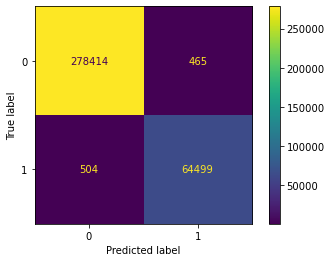

In [ ]:
cm=confusion_matrix(y_test,predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=logm.classes_)
disp.plot()

- We can see that the model has performed decently on the true negetives and true positives,  it has been able to predict the outcomes to a satisfactory level.
- Lets check for the classification report and accuracy.

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    278879
           1       0.99      0.99      0.99     65003

    accuracy                           1.00    343882
   macro avg       1.00      1.00      1.00    343882
weighted avg       1.00      1.00      1.00    343882



In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

0.9971821729546763


In [ ]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,predictions))

0.9952895609497913


- We can see that both precision and recall are exceptionally good for both 0 and 1 i.e. "Fully Paid" or "Charged Off". The acccuracy and the roc auc score are good as well. The model has performed very good on the unseen data.

### Naive Bayes Classifier

- Performing Naive Bayes Classifier with StratifiedKFold Cross Validation using accuracy as a scoring metric for 5 folds.

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(gnb, X_under, y_under, scoring='accuracy', cv=folds)
scores

array([0.88760508, 0.8866637 , 0.89254809, 0.88822957, 0.89793799])

In [ ]:
scores.mean()*100,scores.std()*100

(89.05968860370976, 0.4188652915010225)

- Though it is comparitively less than Logistic Regression, we can see that we have a decent accuracy score across our StratifiedKFold Cross Validation and the standard deviation from the mean is on the lower side.

#### Prediction and Evaluation
- From the Stratified KFold we can see that the Naive Bayes Classifier does a good jod. We will now use the same and predict the unseen data i.e. the test data which has not even been treated for imbalance.

In [ ]:
start = time.time()
gnb.fit(X_under, y_under)
stop = time.time()
print(f"Training time: {stop - start}s")
predictions = gnb.predict(X_test)

Training time: 1.5171101093292236s


- Importing the classification metrics

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

- Running the confusion matrix and generating the image of the confusion matrix

In [ ]:
print(confusion_matrix(y_test,predictions))

[[273031   5848]
 [ 12697  52306]]


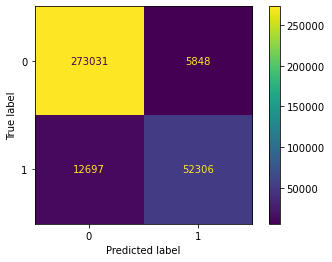

In [ ]:
cm=confusion_matrix(y_test,predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=gnb.classes_)
disp.plot()

- We can see that the model has performed okay on the true negetives and true positives,  it has been able to predict the outcomes to an almost satisfactory level. 
- Lets check for the classification report and accuracy.

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97    278879
           1       0.90      0.80      0.85     65003

    accuracy                           0.95    343882
   macro avg       0.93      0.89      0.91    343882
weighted avg       0.94      0.95      0.94    343882



In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

0.9460716175897547


In [ ]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,predictions))

0.8918504429089869


- We can see that both precision and recall are  good for both 0 and 1 i.e. "Fully Paid" or "Charged Off". The acccuracy and the roc auc score though satisfactory are not upto the mark of the previous model. Though the metrics have significantly dropped when compared to the metrics of Logistic Regression Model, the model has performed decently on the unseen data.

### Decision Tree Classifier

- Performing Decision Tree Classifier with StratifiedKFold Cross Validation using accuracy as a scoring metric for 5 folds.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(dtc, X_under, y_under, scoring='accuracy', cv=folds)
scores

array([0.9953519 , 0.99635728, 0.99568148, 0.99599466, 0.99500569])

In [ ]:
scores.mean()*100,scores.std()*100

(99.56782035243576, 0.047329792555766165)

- We can see that we have a satisfactory accuracy score across our StratifiedKFold Cross Validation and the standard deviation from the mean is on the lower side.

#### Prediction and Evaluation
- From the Stratified KFold we can see that the decision tree classifier does a good jod. We will now use the same and predict the unseen data i.e. the test data which has not even been treated for imbalance.

In [ ]:
start = time.time()
dtc.fit(X_under, y_under)
stop = time.time()
print(f"Training time: {stop - start}s")
predictions = dtc.predict(X_test)

Training time: 29.445313930511475s


- Importing the classification metrics

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

- Running the confusion matrix and generating the image of the confusion matrix

In [ ]:
print(confusion_matrix(y_test,predictions))

[[277758   1121]
 [   246  64757]]


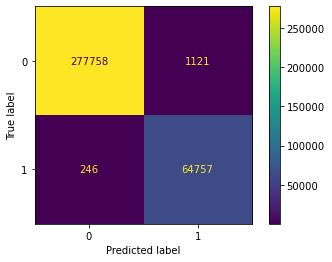

In [ ]:
cm=confusion_matrix(y_test,predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=dtc.classes_)
disp.plot()

- We can see that the model has performed decently on the true negetives and true positives,  it has been able to predict the outcomes to a satisfactory level.
- Lets check for the classification report and accuracy.

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    278879
           1       0.98      1.00      0.99     65003

    accuracy                           1.00    343882
   macro avg       0.99      1.00      0.99    343882
weighted avg       1.00      1.00      1.00    343882



In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

0.9960247992043783


In [ ]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,predictions))

0.9960979474197972


- We can see that both precision and recall are exceptionally good for both 0 and 1 i.e. "Fully Paid" or "Charged Off". The acccuracy and the roc auc score are good as well. The model has performed very good on the unseen data. The only difference when compared to the logistic model is that the precision for 1("Charged Off") has reduced by 0.01.

### Random Forest Classifier

- Performing Random Forest Classifier with StratifiedKFold Cross Validation using accuracy as a scoring metric for 5 folds.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(rfc, X_under, y_under, scoring='accuracy', cv=folds)
scores

array([0.99625845, 0.99639025, 0.99686825, 0.99653859, 0.99650563])

In [ ]:
scores.mean()*100,scores.std()*100

(99.65122343917079, 0.02033595992392988)

- We can see that we have a satisfactory accuracy score across our StratifiedKFold Cross Validation and the standard deviation from the mean is on the lower side.

#### Prediction and Evaluation
- From the Stratified KFold we can see that the random forest classifier does a good jod. We will now use the same and predict the unseen data i.e. the test data which has not even been treated for imbalance.

In [ ]:
start = time.time()
rfc.fit(X_under, y_under)
stop = time.time()
print(f"Training time: {stop - start}s")
predictions = rfc.predict(X_test)

Training time: 112.6166296005249s


- Importing the classification metrics

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

- Running the confusion matrix and generating the image of the confusion matrix

In [ ]:
print(confusion_matrix(y_test,predictions))

[[278584    295]
 [   402  64601]]


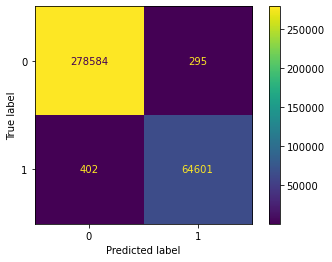

In [ ]:
cm=confusion_matrix(y_test,predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=rfc.classes_)
disp.plot()

- We can see that the model has performed decently on the true negetives and true positives,  it has been able to predict the outcomes to a satisfactory level.
- Lets check for the classification report and accuracy.

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    278879
           1       1.00      0.99      0.99     65003

    accuracy                           1.00    343882
   macro avg       1.00      1.00      1.00    343882
weighted avg       1.00      1.00      1.00    343882



In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

0.9979731419498549


In [ ]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,predictions))

0.9963789318069088


- We can see that both precision and recall are exceptionally good for both 0 and 1 i.e. "Fully Paid" or "Charged Off". The model has performed very good on the unseen data. It has the highest accuracy and roc auc score until now. The only difference when compared to the logistic model and the decision tree is that the precision for 1("Charged Off") has increased by 0.01, this model is even more beneficial for us to predict the defaulters compared to the previous ones.

### Gradient Boosting Classifier

- Performing Gradient Boosting Classifier with StratifiedKFold Cross Validation using accuracy as a scoring metric for 5 folds.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(gbc, X_under, y_under, scoring='accuracy', cv=folds)
scores

array([0.99653865, 0.99680232, 0.9970166 , 0.99642321, 0.99639025])

In [ ]:
scores.mean()*100,scores.std()*100

(99.66342067986889, 0.023985396092395077)

- We can see that we have a satisfactory accuracy score across our StratifiedKFold Cross Validation and the standard deviation from the mean is on the lower side.

#### Prediction and Evaluation
- From the Stratified KFold we can see that the Gradient Boosting Classifier does a good jod. We will now use the same and predict the unseen data i.e. the test data which has not even been treated for imbalance.

In [ ]:
start = time.time()
gbc.fit(X_under, y_under)
stop = time.time()
print(f"Training time: {stop - start}s")
predictions = gbc.predict(X_test)

Training time: 775.9008235931396s


- Importing the classification metrics

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

- Running the confusion matrix and generating the image of the confusion matrix

In [ ]:
print(confusion_matrix(y_test,predictions))

[[278737    142]
 [   382  64621]]


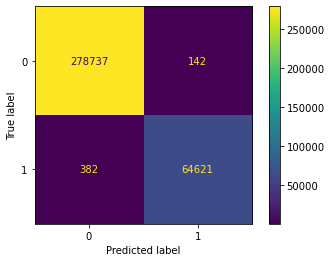

In [ ]:
cm=confusion_matrix(y_test,predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=gbc.classes_)
disp.plot()

- We can see that the model has performed decently on the true negetives and true positives,  it has been able to predict the outcomes to a satisfactory level.
- Lets check for the classification report and accuracy.

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    278879
           1       1.00      0.99      1.00     65003

    accuracy                           1.00    343882
   macro avg       1.00      1.00      1.00    343882
weighted avg       1.00      1.00      1.00    343882



In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

0.9984762214945825


In [ ]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,predictions))

0.9968070833759547


- We can see that both precision and recall are exceptionally good for both 0 and 1 i.e. "Fully Paid" or "Charged Off". The model has performed very good on the unseen data. It has a higher accuracy (by 0.001) and an almost equal roc auc score when compared to the Random Forest Classifier. The classfication report is similar to that of the random forest classifier, this model as well is more beneficial for us to predict the defaulters compared to the previous ones.

### XG Boost

- Performing XG Boost with StratifiedKFold Cross Validation using accuracy as a scoring metric for 5 folds.

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
xg = XGBClassifier()
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(xg, X_under, y_under, scoring='accuracy', cv=folds)
scores

array([0.99909346, 0.99927475, 0.99914289, 0.99927475, 0.99925827])

In [ ]:
scores.mean()*100,scores.std()*100

(99.92088246272186, 0.007588834718149069)

- We can see that we have a satisfactory accuracy score across our StratifiedKFold Cross Validation and the standard deviation from the mean is on the lower side.

#### Prediction and Evaluation
- From the Stratified KFold we can see that the XG Boost classifier does a good jod. We will now use the same and predict the unseen data i.e. the test data which has not even been treated for imbalance.

In [ ]:
start = time.time()
xg.fit(X_under, y_under)
stop = time.time()
print(f"Training time: {stop - start}s")
predictions = xg.predict(X_test)

Training time: 119.51730608940125s


- Importing the classification metrics

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

- Running the confusion matrix and generating the image of the confusion matrix

In [ ]:
print(confusion_matrix(y_test,predictions))

[[278874      5]
 [    75  64928]]


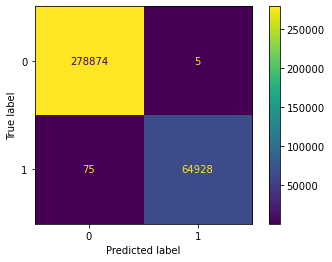

In [ ]:
cm=confusion_matrix(y_test,predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=xg.classes_)
disp.plot()

- We can see that the model has performed decently on the true negetives and true positives,  it has been able to predict the outcomes to a satisfactory level.
- Lets check for the classification report and accuracy.

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    278879
           1       1.00      1.00      1.00     65003

    accuracy                           1.00    343882
   macro avg       1.00      1.00      1.00    343882
weighted avg       1.00      1.00      1.00    343882



In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

0.9997673620602416


In [ ]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,predictions))

0.9994141390877773


- We can see that both precision and recall are exceptionally good for both 0 and 1 i.e. "Fully Paid" or "Charged Off". It has the perfect scores for precision and recall i.e. 1.00. The model has performed very good on the unseen data. It has beaten the Random Forest Model model by getting the highest accuracy and roc auc scores. Most importantly, the number of misclassified data points as well are extremely low, only 80 (in this run).

## Conclusion - Part 1
- Let us firstly create a table of all the metrics under consideration for each of the models that we have used.

In [ ]:
data = {'Time(in secs)':[28.06, 1.5, 29.44, 112.61, 775.90, 119.51], 'Accuracy':[0.9971, 0.9460, 0.9960, 0.9979, 0.9984, 0.9997], 
        'ROC AUC Score':[0.9952, 0.8918, 0.9960, 0.9963, 0.9968, 0.9994]} 
result = pd.DataFrame(data, index =['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost'])
result

,Time(in secs),Accuracy,ROC AUC Score
Logistic Regression,28.06,0.9971,0.9952
Naive Bayes,1.50,0.9460,0.8918
Decision Tree,29.44,0.9960,0.9960
Random Forest,112.61,0.9979,0.9963
Gradient Boosting,775.90,0.9984,0.9968
XGBoost,119.51,0.9997,0.9994


##### Note that the time, roc auc and accuracy scores may slightly vary if the models are re-run but it would affect our final insights to a large extent.
- Almost all the models except Naive Bayes has a near perfect accuracy and auc roc scores.
- We can see that in terms of time, Naive Bayes CLassifier was the fastest though it Accuracy and Auc roc scores were not satisfactory when compared to other models.
- Decisiom Tree and Logistic Regression were moderate in the training time consumption. Random Forest and XG Boost classifier are on the medium to high range.
- Gradient Boosting was the most time consuming model amongst all the models that we had used, though it is the best in terms of accuracy and roc auc scores amongst the sklearn models. XG Boost gives a slightly better accuracy and roc auc score for almost 1/6th of the time taken by Gradient Boosting.
- Note that these times are specific to our data and would vary for models built on different data.

### The best performing model that can be used for this lending club default prediction is XGBoost (considering all the metrics including misclassifications), if a model was to be selected only from the SKlearn package, then Gradiant Boosting is the best amongst the models used.
- It is imperative to conduct proper data cleaning, transformation, scaling, outlier treatment and handling data imablance and build all the models on the same data to get a better comparison to select the best model.
- From the models we have implemented, we can can select the best model only based on the number of misclasifications (and precision/recall) since the roc auc and accuracy for all the models except for naive bayes are near perfect.
- Cross Validation, though computationally intensive and time-consuming (almost five times the Training time for each of the models) gives us the idea on how the model performs on different data and whether it actually performs well on the unseen data.

# Part 2
- Our objective here is to build a linear regression model using the variables in the dataset.
- Let us first consider the new_df dataset that has been treated for all the missing values, outliers and other imputations that may not have benfitted our model building.

In [ ]:
df_2=new_df.copy(deep=True)
df_2.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
0,3600.0,3600.0,3600.0,36.0,13.99,123.03,C,C4,10+,MORTGAGE,55000.0,Not Verified,0,debt_consolidation,5.91,0.0,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,122.67,564.0,560.0,0.0,Individual,0.0,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,Cash,N,Aug,2003,Dec,2015,Jan,2019,Mar,2019
1,24700.0,24700.0,24700.0,36.0,11.99,820.28,C,C1,10+,MORTGAGE,65000.0,Not Verified,0,small_business,16.06,1.0,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,926.35,699.0,695.0,0.0,Individual,0.0,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,Cash,N,Dec,1999,Dec,2015,Jun,2016,Mar,2019
2,20000.0,20000.0,20000.0,60.0,10.78,432.66,B,B4,10+,MORTGAGE,63000.0,Not Verified,0,home_improvement,10.78,0.0,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,w,22705.924294,22705.92,20000.0,2705.92,0.0,0.0,0.0,15813.30,704.0,700.0,0.0,Joint App,0.0,0.0,189699.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,Cash,N,Aug,2000,Dec,2015,Jun,2017,Mar,2019
4,10400.0,10400.0,10400.0,60.0,22.45,289.91,F,F1,3,MORTGAGE,104433.0,Source Verified,0,major_purchase,25.37,1.0,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,11740.500000,11740.50,10400.0,1340.50,0.0,0.0,0.0,10128.96,704.0,700.0,0.0,Individual,0.0,0.0,331730.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,Cash,N,Jun,1998,Dec,2015,Jul,2016,Mar,2018
5,11950.0,11950.0,11950.0,36.0,13.44,405.18,C,C3,4,RENT,34000.0,Source Verified,0,debt_consolidation,10.20,0.0,690.0,694.0,0.0,5.0,0.0,8822.0,68.4,6.0,w,13708.948530,13708.95,11950.0,1758.95,0.0,0.0,0.0,7653.56,759.0,755.0,0.0,Individual,0.0,0.0,12798.0,12900.0,0.0,2560.0,844.0,91.0,0.0,0.0,338.0,54.0,32.0,32.0,0.0,36.0,0.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,Cash,N,Oct,1987,Dec,2015,May,2017,May,2017


### The Business Case: To predict the high credit limit for an individual with generic variables.
- Here the term generic variables indicates that the variables considered for building our model are more about the financial profile of the candidate present in the data set and not specific about the loan that the candidate had applied for.
#### Context and Feature importance of this model<br>
- Our dependent variable i.e. tot_hi_cred_lim -  high credit limit indicates the maximum amount of credit a financial instituion can extend to its client. The credit limit is cosnidered the main factors during approval or rejection of a loan (based on the amount asked vs the credit limit) and this limit can also alter the future probability of obtaining credit.
- Our Independent variables and what they define is as follows:
1. **avg_cur_bal** - indicates the average current balance in all of the candidate's accounts.
2. **num_rev_accts** - total number of revolving accounts.  A revolving account is created by a financial institution to enable a customer to incur a debt. The loan interest is charged to the balance used and the customer will have to pay the same. If the revolving account is poorly managed then it cand directl impact the credit worthiness.
3. **num_op_rev_tl** - indicates number of open revolving accounts.
4. mo_sin_old_rev_tl_op - indicates the months since oldest revolving account was openend.
5. **num_sats** - inicates number of such satisfactory accounts.
6. **num_tl_op_past_12m** - indicates numberr of such accounts opened in past 12 months.
7. **num_accts_ever_120_pd** - indicates the number of accounts due more than a period of 120 days.
8. **num_bc_tl** - indicates number of bankcard accounts accounts (credit cards or charge cards).
9. **num_actv_bc_tl** - indicates the number of currently active bankcard accounts.
10. **num_actv_rev_tl** - indicates the number of currently active revolving credit trades or transactions.
11. **num_bc_sats** - indicates the number of satisfactory bankcard accounts (well maintained and managed)
12. **num_il_tl** - indicates number of installment accounts.
13. **pct_tl_nvr_dlq** - indicates percentage of trade never delinquent i.e. trades which have been paid off before the due date.
14. **pub_rec_bankruptcies** - indicates number of public record bankruptcies
15. **tax_liens** - indicates number of tax liens. A tax lien is when the governemnt has a claim on your properties when you fail to pay tax.
16. **tot_coll_amt** - indicates total collection amounts ever owed.
17. **tot_cur_bal** - total current balance of all accounts.
18. **total_il_high_credit_limit** - indicates the highest credit installment limit or the highest amount that the candidate can pay in one installment.

- Let us first create a new dataframe that consists of only the variables defined above.

In [ ]:
cols=['avg_cur_bal','mo_sin_old_rev_tl_op','num_accts_ever_120_pd','num_actv_bc_tl',
      'num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_sats','num_tl_op_past_12m',
      'pct_tl_nvr_dlq','pub_rec_bankruptcies','tax_liens','tot_coll_amt','tot_cur_bal','tot_hi_cred_lim',
      'total_il_high_credit_limit']

In [ ]:
df_3=df_2[cols]
df_3.head()

,avg_cur_bal,mo_sin_old_rev_tl_op,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_coll_amt,tot_cur_bal,tot_hi_cred_lim,total_il_high_credit_limit
0,20701.0,128.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,7.0,3.0,76.9,0.0,0.0,722.0,144904.0,178050.0,13734.0
1,9733.0,192.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,22.0,2.0,97.4,0.0,0.0,0.0,204396.0,314017.0,24667.0
2,31617.0,184.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,6.0,0.0,100.0,0.0,0.0,0.0,189699.0,218418.0,14877.0
4,27644.0,210.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,12.0,4.0,96.6,0.0,0.0,0.0,331730.0,439570.0,88097.0
5,2560.0,54.0,0.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,5.0,0.0,100.0,0.0,0.0,0.0,12798.0,16900.0,4000.0


- We can see that all the columns are of integer data type.
- Let us recheck the number of missing values for confirmation.

In [ ]:
df_3.isnull().sum()

avg_cur_bal                   0
mo_sin_old_rev_tl_op          0
num_accts_ever_120_pd         0
num_actv_bc_tl                0
num_actv_rev_tl               0
num_bc_sats                   0
num_bc_tl                     0
num_il_tl                     0
num_op_rev_tl                 0
num_rev_accts                 0
num_sats                      0
num_tl_op_past_12m            0
pct_tl_nvr_dlq                0
pub_rec_bankruptcies          0
tax_liens                     0
tot_coll_amt                  0
tot_cur_bal                   0
tot_hi_cred_lim               0
total_il_high_credit_limit    0
dtype: int64

- We can see that there are no missing values.

##### We will now proceed with dividing the data into train and test sets using the train_test_split.

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_3, train_size = 0.7, test_size = 0.3, random_state = 100)

###### Rescaling the features using Min-Max Scaling so that all the values are fit between 1 and 0.
- Create a list of columns of the dataset to pass it through the scaler. Here since all the variables that we have selected are of float dtype, all the columns must be rescaled.

In [ ]:
int_col2 = [x for x in df_train.columns if (df_train[x].dtype=='float')]
int_col2

['avg_cur_bal',
 'mo_sin_old_rev_tl_op',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_sats',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'pub_rec_bankruptcies',
 'tax_liens',
 'tot_coll_amt',
 'tot_cur_bal',
 'tot_hi_cred_lim',
 'total_il_high_credit_limit']

- We will apply fit_transform on training data set and transform only on the test dataset.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train[int_col2] = scaler.fit_transform(df_train[int_col2])
df_test[int_col2] = scaler.transform(df_test[int_col2])
df_train.head()

,avg_cur_bal,mo_sin_old_rev_tl_op,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_coll_amt,tot_cur_bal,tot_hi_cred_lim,total_il_high_credit_limit
81550,0.166490,0.206960,0.000000,0.375000,0.217391,0.272727,0.21875,0.207547,0.250000,0.245283,0.243243,0.250000,1.000000,0.000000,0.0,0.000000,0.230213,0.227219,0.177605
2179251,0.010833,0.316850,0.250000,0.250000,0.130435,0.272727,0.28125,0.018868,0.218750,0.188679,0.189189,0.083333,0.020548,0.000000,0.0,0.081722,0.011925,0.030442,0.075824
298158,0.248472,0.267399,0.000000,0.187500,0.130435,0.227273,0.34375,0.094340,0.250000,0.396226,0.270270,0.083333,0.933790,0.000000,0.0,0.000000,0.314070,0.346203,0.052446
1081584,0.012495,0.161172,0.000000,0.062500,0.043478,0.045455,0.03125,0.132075,0.031250,0.018868,0.108108,0.000000,1.000000,0.333333,0.0,0.000000,0.010220,0.019869,0.075115
1921384,0.094822,0.281752,0.042341,0.228342,0.202071,0.272727,0.22147,0.164538,0.227431,0.237044,0.162162,0.181926,0.866515,0.000000,0.0,0.010913,0.115274,0.123017,0.120008


##### Dividing the training dataset into X and Y for model building

In [ ]:
y_train = df_train.pop('tot_hi_cred_lim')
X_train = df_train

##### We will now proceed to build the model using statsmodel.api for the detailed statistics.
- We will have to a constant variable as by default no constant is considered in statsmodel.api. We have to ensure that the training data with the constant is stored in a different dataframe so that the constant can be recalculated iteratively after removaing an insignificant column.

In [ ]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train)

- We now run the linear model and check for the summary.

In [ ]:
lm = sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        tot_hi_cred_lim   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 1.891e+06
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:35:08   Log-Likelihood:             2.1156e+06
No. Observations:              802391   AIC:                        -4.231e+06
Df Residuals:                  802372   BIC:                        -4.231e+06
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0023      0.000    -16.576      0.000      -0.003      -0.002
avg_cur_bal                   -0.0243      0.000    -51.128      0.000      -0.025      -0.023
mo_sin_old_rev_tl_op           0.0192      0.000    139.711      0.000       0.019       0.019
num_accts_ever_120_pd         -0.0056      0.000    -21.656      0.000      -0.006      -0.005
num_actv_bc_tl                -0.0178      0.000    -46.613      0.000      -0.019      -0.017
num_actv_rev_tl               -0.0338      0.000    -99.362      0.000      -0.034      -0.033
num_bc_sats                    0.0382      0.000     97.843      0.000       0.037       0.039
num_bc_tl                      0.0045      0.000     12.001      0.000       0.004       0.005
num_il_tl                     -0.0163      0.000    -76.199      0.000      -0.017      -0.016
num_op_rev_tl                  0.0508      0.000    104.004      0.000       0.050       0.052
num_rev_accts                  0.0012      0.000      2.940      0.003       0.000       0.002
num_sats                      -0.0020      0.000     -5.512      0.000      -0.003      -0.001
num_tl_op_past_12m            -0.0084      0.000    -56.741      0.000      -0.009      -0.008
pct_tl_nvr_dlq                 0.0026      0.000     19.502      0.000       0.002       0.003
pub_rec_bankruptcies          -0.0138      0.000    -83.678      0.000      -0.014      -0.013
tax_liens                      0.0032      0.000      9.653      0.000       0.003       0.004
tot_coll_amt                   0.0014      0.000      3.326      0.001       0.001       0.002
tot_cur_bal                    0.9748      0.000   2220.925      0.000       0.974       0.976
total_il_high_credit_limit     0.0218      0.000     88.865      0.000       0.021       0.022
==============================================================================
Omnibus:                   574871.434   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         39741604.216
Skew:                           2.807   Prob(JB):                         0.00
Kurtosis:                      37.017   Cond. No.                         53.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- We can see that we have obtained an Adjusted R Square score of 0.977 which is very good. All the variables have their p-values under 0.05 that indicates that they are significant in this model. The p-value of the constant is to be ignored.

##### Let us now check for the variance inflation factor that tells us the amount of multicollinearity present in the dataset.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,num_op_rev_tl,44.44
9,num_rev_accts,33.92
3,num_actv_bc_tl,27.37
10,num_sats,25.78
6,num_bc_tl,25.26
5,num_bc_sats,25.23
4,num_actv_rev_tl,18.52
16,tot_cur_bal,13.01
0,avg_cur_bal,10.74
12,pct_tl_nvr_dlq,9.78


- We can see that there are numerous variables that have a high VIF, these must be imputed one by one until the VIFs of all the variables are below 5.
- We can go ahead and drop the num_op_rev_tl variable as it has the highest VIF. The column must be droppen from the actual X_train dataframe that doesnt have a constant.

In [ ]:
X_train=X_train.drop('num_op_rev_tl',1)

##### We now have to add the constant again rebuild the model and check for the p-values and VIFs accordingly.

In [ ]:
X_train_lm = sm.add_constant(X_train)
lm1 = sm.OLS(y_train,X_train_lm).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        tot_hi_cred_lim   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 1.975e+06
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:35:34   Log-Likelihood:             2.1102e+06
No. Observations:              802391   AIC:                        -4.220e+06
Df Residuals:                  802373   BIC:                        -4.220e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0025      0.000    -18.189      0.000      -0.003      -0.002
avg_cur_bal                   -0.0241      0.000    -50.388      0.000      -0.025      -0.023
mo_sin_old_rev_tl_op           0.0185      0.000    134.451      0.000       0.018       0.019
num_accts_ever_120_pd         -0.0045      0.000    -17.612      0.000      -0.005      -0.004
num_actv_bc_tl                -0.0223      0.000    -58.377      0.000      -0.023      -0.022
num_actv_rev_tl               -0.0221      0.000    -68.471      0.000      -0.023      -0.022
num_bc_sats                    0.0551      0.000    154.605      0.000       0.054       0.056
num_bc_tl                     -0.0077      0.000    -21.755      0.000      -0.008      -0.007
num_il_tl                     -0.0231      0.000   -113.225      0.000      -0.024      -0.023
num_rev_accts                  0.0224      0.000     63.317      0.000       0.022       0.023
num_sats                       0.0194      0.000     66.150      0.000       0.019       0.020
num_tl_op_past_12m            -0.0074      0.000    -49.871      0.000      -0.008      -0.007
pct_tl_nvr_dlq                 0.0040      0.000     29.387      0.000       0.004       0.004
pub_rec_bankruptcies          -0.0137      0.000    -82.829      0.000      -0.014      -0.013
tax_liens                      0.0040      0.000     11.783      0.000       0.003       0.005
tot_coll_amt                   0.0021      0.000      4.850      0.000       0.001       0.003
tot_cur_bal                    0.9721      0.000   2203.849      0.000       0.971       0.973
total_il_high_credit_limit     0.0183      0.000     74.960      0.000       0.018       0.019
==============================================================================
Omnibus:                   565840.774   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         37535280.001
Skew:                           2.750   Prob(JB):                         0.00
Kurtosis:                      36.052   Cond. No.                         50.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,num_actv_bc_tl,27.01
8,num_rev_accts,25.38
6,num_bc_tl,22.76
5,num_bc_sats,20.82
9,num_sats,17.22
4,num_actv_rev_tl,16.51
15,tot_cur_bal,12.97
0,avg_cur_bal,10.74
11,pct_tl_nvr_dlq,9.52
1,mo_sin_old_rev_tl_op,4.89


- We can see that the Adjuste R Squared score has not dropped. All the p-values are under control. We can go ahead and drop the num_actv_bc_tl variable as it has the highest VIF.

In [ ]:
X_train=X_train.drop('num_actv_bc_tl',1)

##### Rebuild the model and check for the p-values and VIFs accordingly.

In [ ]:
X_train_lm = sm.add_constant(X_train)
lm2 = sm.OLS(y_train,X_train_lm).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        tot_hi_cred_lim   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 2.089e+06
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:36:08   Log-Likelihood:             2.1085e+06
No. Observations:              802391   AIC:                        -4.217e+06
Df Residuals:                  802374   BIC:                        -4.217e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0030      0.000    -21.266      0.000      -0.003      -0.003
avg_cur_bal                   -0.0241      0.000    -50.269      0.000      -0.025      -0.023
mo_sin_old_rev_tl_op           0.0185      0.000    133.863      0.000       0.018       0.019
num_accts_ever_120_pd         -0.0052      0.000    -19.968      0.000      -0.006      -0.005
num_actv_rev_tl               -0.0356      0.000   -156.988      0.000      -0.036      -0.035
num_bc_sats                    0.0443      0.000    145.240      0.000       0.044       0.045
num_bc_tl                     -0.0144      0.000    -42.782      0.000      -0.015      -0.014
num_il_tl                     -0.0235      0.000   -114.707      0.000      -0.024      -0.023
num_rev_accts                  0.0304      0.000     92.890      0.000       0.030       0.031
num_sats                       0.0208      0.000     70.991      0.000       0.020       0.021
num_tl_op_past_12m            -0.0065      0.000    -43.755      0.000      -0.007      -0.006
pct_tl_nvr_dlq                 0.0036      0.000     26.379      0.000       0.003       0.004
pub_rec_bankruptcies          -0.0135      0.000    -81.164      0.000      -0.014      -0.013
tax_liens                      0.0038      0.000     11.301      0.000       0.003       0.004
tot_coll_amt                   0.0023      0.000      5.254      0.000       0.001       0.003
tot_cur_bal                    0.9719      0.000   2198.778      0.000       0.971       0.973
total_il_high_credit_limit     0.0179      0.000     73.055      0.000       0.017       0.018
==============================================================================
Omnibus:                   564536.032   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         36872157.574
Skew:                           2.745   Prob(JB):                         0.00
Kurtosis:                      35.752   Cond. No.                         49.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,num_rev_accts,21.63
5,num_bc_tl,20.43
8,num_sats,17.11
4,num_bc_sats,15.03
14,tot_cur_bal,12.97
0,avg_cur_bal,10.74
10,pct_tl_nvr_dlq,9.16
3,num_actv_rev_tl,8.05
1,mo_sin_old_rev_tl_op,4.89
6,num_il_tl,4.86


- We can see that the Adjuste R Squared score has not dropped. All the p-values are under control. We can go ahead and drop the num_rev_accts variable as it has the highest VIF.

In [ ]:
X_train=X_train.drop('num_rev_accts',1)

##### Rebuild the model and check for the p-values and VIFs accordingly.

In [ ]:
X_train_lm = sm.add_constant(X_train)
lm3 = sm.OLS(y_train,X_train_lm).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        tot_hi_cred_lim   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 2.204e+06
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:36:45   Log-Likelihood:             2.1043e+06
No. Observations:              802391   AIC:                        -4.208e+06
Df Residuals:                  802375   BIC:                        -4.208e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0025      0.000    -17.746      0.000      -0.003      -0.002
avg_cur_bal                   -0.0238      0.000    -49.414      0.000      -0.025      -0.023
mo_sin_old_rev_tl_op           0.0212      0.000    156.343      0.000       0.021       0.021
num_accts_ever_120_pd         -0.0052      0.000    -20.129      0.000      -0.006      -0.005
num_actv_rev_tl               -0.0308      0.000   -138.548      0.000      -0.031      -0.030
num_bc_sats                    0.0318      0.000    115.535      0.000       0.031       0.032
num_bc_tl                      0.0100      0.000     47.578      0.000       0.010       0.010
num_il_tl                     -0.0259      0.000   -127.096      0.000      -0.026      -0.026
num_sats                       0.0331      0.000    125.458      0.000       0.033       0.034
num_tl_op_past_12m            -0.0049      0.000    -33.511      0.000      -0.005      -0.005
pct_tl_nvr_dlq                 0.0034      0.000     25.052      0.000       0.003       0.004
pub_rec_bankruptcies          -0.0125      0.000    -74.890      0.000      -0.013      -0.012
tax_liens                      0.0029      0.000      8.652      0.000       0.002       0.004
tot_coll_amt                   0.0029      0.000      6.481      0.000       0.002       0.004
tot_cur_bal                    0.9712      0.000   2185.839      0.000       0.970       0.972
total_il_high_credit_limit     0.0150      0.000     61.357      0.000       0.014       0.015
==============================================================================
Omnibus:                   557390.011   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         35397645.700
Skew:                           2.699   Prob(JB):                         0.00
Kurtosis:                      35.088   Cond. No.                         48.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,num_sats,13.66
13,tot_cur_bal,12.96
4,num_bc_sats,12.11
0,avg_cur_bal,10.74
9,pct_tl_nvr_dlq,9.14
5,num_bc_tl,7.96
3,num_actv_rev_tl,7.60
6,num_il_tl,4.78
1,mo_sin_old_rev_tl_op,4.63
14,total_il_high_credit_limit,4.07


- We can see that the Adjuste R Squared score has dropped only by 0.001. All the p-values are under control. We can go ahead and drop the num_sats variable as it has the highest VIF.

In [ ]:
X_train=X_train.drop('num_sats',1)

##### Rebuild the model and check for the p-values and VIFs accordingly.

In [ ]:
X_train_lm = sm.add_constant(X_train)
lm4 = sm.OLS(y_train,X_train_lm).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        tot_hi_cred_lim   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 2.315e+06
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:37:06   Log-Likelihood:             2.0965e+06
No. Observations:              802391   AIC:                        -4.193e+06
Df Residuals:                  802376   BIC:                        -4.193e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0023      0.000    -16.068      0.000      -0.003      -0.002
avg_cur_bal                   -0.0466      0.000   -103.718      0.000      -0.048      -0.046
mo_sin_old_rev_tl_op           0.0213      0.000    155.067      0.000       0.021       0.022
num_accts_ever_120_pd         -0.0046      0.000    -17.380      0.000      -0.005      -0.004
num_actv_rev_tl               -0.0195      0.000    -95.185      0.000      -0.020      -0.019
num_bc_sats                    0.0389      0.000    143.216      0.000       0.038       0.039
num_bc_tl                      0.0123      0.000     58.023      0.000       0.012       0.013
num_il_tl                     -0.0173      0.000    -89.167      0.000      -0.018      -0.017
num_tl_op_past_12m            -0.0024      0.000    -16.142      0.000      -0.003      -0.002
pct_tl_nvr_dlq                 0.0043      0.000     31.118      0.000       0.004       0.005
pub_rec_bankruptcies          -0.0130      0.000    -77.643      0.000      -0.013      -0.013
tax_liens                      0.0025      0.000      7.357      0.000       0.002       0.003
tot_coll_amt                   0.0038      0.000      8.564      0.000       0.003       0.005
tot_cur_bal                    0.9918      0.000   2378.969      0.000       0.991       0.993
total_il_high_credit_limit     0.0184      0.000     75.408      0.000       0.018       0.019
==============================================================================
Omnibus:                   552024.035   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         33338725.720
Skew:                           2.674   Prob(JB):                         0.00
Kurtosis:                      34.122   Cond. No.                         44.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,num_bc_sats,11.58
12,tot_cur_bal,11.13
0,avg_cur_bal,9.12
8,pct_tl_nvr_dlq,9.00
5,num_bc_tl,7.90
3,num_actv_rev_tl,6.35
1,mo_sin_old_rev_tl_op,4.63
6,num_il_tl,4.23
13,total_il_high_credit_limit,4.02
7,num_tl_op_past_12m,2.94


- We can see that the Adjuste R Squared score has not dropped. All the p-values are under control. We can go ahead and drop the num_bc_sats variable as it has the highest VIF.

In [ ]:
X_train=X_train.drop('num_bc_sats',1)

##### Rebuild the model and check for the p-values and VIFs accordingly.

In [ ]:
X_train_lm = sm.add_constant(X_train)
lm5 = sm.OLS(y_train,X_train_lm).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        tot_hi_cred_lim   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                 2.429e+06
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:37:40   Log-Likelihood:             2.0863e+06
No. Observations:              802391   AIC:                        -4.173e+06
Df Residuals:                  802377   BIC:                        -4.172e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0002      0.000     -1.241      0.215      -0.000       0.000
avg_cur_bal                   -0.0552      0.000   -122.437      0.000      -0.056      -0.054
mo_sin_old_rev_tl_op           0.0194      0.000    140.573      0.000       0.019       0.020
num_accts_ever_120_pd         -0.0085      0.000    -32.106      0.000      -0.009      -0.008
num_actv_rev_tl               -0.0066      0.000    -35.538      0.000      -0.007      -0.006
num_bc_tl                      0.0305      0.000    177.456      0.000       0.030       0.031
num_il_tl                     -0.0201      0.000   -102.983      0.000      -0.021      -0.020
num_tl_op_past_12m            -0.0017      0.000    -11.377      0.000      -0.002      -0.001
pct_tl_nvr_dlq                 0.0050      0.000     35.807      0.000       0.005       0.005
pub_rec_bankruptcies          -0.0151      0.000    -89.029      0.000      -0.015      -0.015
tax_liens                      0.0035      0.000     10.102      0.000       0.003       0.004
tot_coll_amt                   0.0029      0.000      6.435      0.000       0.002       0.004
tot_cur_bal                    0.9990      0.000   2383.466      0.000       0.998       1.000
total_il_high_credit_limit     0.0194      0.000     78.302      0.000       0.019       0.020
==============================================================================
Omnibus:                   547001.483   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         30818278.191
Skew:                           2.658   Prob(JB):                         0.00
Kurtosis:                      32.892   Cond. No.                         43.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,tot_cur_bal,11.02
0,avg_cur_bal,9.01
7,pct_tl_nvr_dlq,8.38
4,num_bc_tl,5.07
3,num_actv_rev_tl,5.04
1,mo_sin_old_rev_tl_op,4.61
5,num_il_tl,4.19
12,total_il_high_credit_limit,4.01
6,num_tl_op_past_12m,2.94
2,num_accts_ever_120_pd,1.38


- We can see that the Adjuste R Squared score has dropped only by 0.001. All the p-values are under control.
- Here we can see that tot_cur_bal (total current balance) has the highest VIF, and is highly collinar with the avg_cur_bal (average current balance). Removal of either of these variables is subjective as the deal with basically the same element of the financial profile.
- Dropping the tot_cur_bal and re-building the model resulted in a drastic drop of r-squared to 0.81. Not willing to lose on the R-Squared we proceed to remove the avg_cur_bal variable.

In [ ]:
X_train=X_train.drop('avg_cur_bal',1)

##### Rebuild the model and check for the p-values and VIFs accordingly.

In [ ]:
X_train_lm = sm.add_constant(X_train)
lm6 = sm.OLS(y_train,X_train_lm).fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        tot_hi_cred_lim   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                 2.582e+06
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:38:17   Log-Likelihood:             2.0789e+06
No. Observations:              802391   AIC:                        -4.158e+06
Df Residuals:                  802378   BIC:                        -4.158e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0047      0.000    -33.880      0.000      -0.005      -0.004
mo_sin_old_rev_tl_op           0.0191      0.000    137.065      0.000       0.019       0.019
num_accts_ever_120_pd         -0.0087      0.000    -32.725      0.000      -0.009      -0.008
num_actv_rev_tl                0.0022      0.000     12.454      0.000       0.002       0.003
num_bc_tl                      0.0332      0.000    193.193      0.000       0.033       0.034
num_il_tl                     -0.0173      0.000    -88.108      0.000      -0.018      -0.017
num_tl_op_past_12m            -0.0002      0.000     -1.068      0.286      -0.000       0.000
pct_tl_nvr_dlq                 0.0059      0.000     41.803      0.000       0.006       0.006
pub_rec_bankruptcies          -0.0154      0.000    -90.231      0.000      -0.016      -0.015
tax_liens                      0.0032      0.000      9.207      0.000       0.003       0.004
tot_coll_amt                   0.0033      0.000      7.223      0.000       0.002       0.004
tot_cur_bal                    0.9535      0.000   4876.807      0.000       0.953       0.954
total_il_high_credit_limit     0.0256      0.000    104.446      0.000       0.025       0.026
==============================================================================
Omnibus:                   537995.430   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         28392665.578
Skew:                           2.611   Prob(JB):                         0.00
Kurtosis:                      31.670   Cond. No.                         32.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- We can see that the accuracy has not dropped at all after removing the avg_cur_bal variable.
- Even before we proceed to check for the VIFs, we can see that suddenly num_tl_op_past_12m variable has a high p-value, which indicates that it has become insignificant and must be dropped.

In [ ]:
X_train=X_train.drop('num_tl_op_past_12m',1)

##### Rebuild the model and check for the p-values and VIFs accordingly.

In [ ]:
X_train_lm = sm.add_constant(X_train)
lm7 = sm.OLS(y_train,X_train_lm).fit()
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        tot_hi_cred_lim   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                 2.817e+06
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:38:55   Log-Likelihood:             2.0789e+06
No. Observations:              802391   AIC:                        -4.158e+06
Df Residuals:                  802379   BIC:                        -4.158e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0047      0.000    -34.130      0.000      -0.005      -0.004
mo_sin_old_rev_tl_op           0.0191      0.000    137.889      0.000       0.019       0.019
num_accts_ever_120_pd         -0.0087      0.000    -32.870      0.000      -0.009      -0.008
num_actv_rev_tl                0.0021      0.000     12.475      0.000       0.002       0.002
num_bc_tl                      0.0332      0.000    194.196      0.000       0.033       0.034
num_il_tl                     -0.0173      0.000    -88.874      0.000      -0.018      -0.017
pct_tl_nvr_dlq                 0.0059      0.000     41.803      0.000       0.006       0.006
pub_rec_bankruptcies          -0.0154      0.000    -90.995      0.000      -0.016      -0.015
tax_liens                      0.0032      0.000      9.188      0.000       0.003       0.004
tot_coll_amt                   0.0033      0.000      7.196      0.000       0.002       0.004
tot_cur_bal                    0.9535      0.000   4880.278      0.000       0.953       0.954
total_il_high_credit_limit     0.0256      0.000    104.466      0.000       0.025       0.026
==============================================================================
Omnibus:                   538018.780   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         28392834.201
Skew:                           2.611   Prob(JB):                         0.00
Kurtosis:                      31.670   Cond. No.                         32.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,pct_tl_nvr_dlq,6.80
3,num_bc_tl,4.93
0,mo_sin_old_rev_tl_op,4.54
2,num_actv_rev_tl,4.22
4,num_il_tl,4.08
10,total_il_high_credit_limit,3.87
9,tot_cur_bal,2.47
1,num_accts_ever_120_pd,1.32
6,pub_rec_bankruptcies,1.15
8,tot_coll_amt,1.07


- We can see that the Adjuste R Squared score has not dropped. All the p-values are under control. We can also see that the VIF of tot_cur_bal has drastically reduced after removing avg_cur_bal. We can go ahead and drop the pct_tl_nvr_dlq variable as it has the highest VIF.

In [ ]:
X_train=X_train.drop('pct_tl_nvr_dlq',1)

##### Rebuild the model and check for the p-values and VIFs accordingly.

In [ ]:
X_train_lm = sm.add_constant(X_train)
lm8 = sm.OLS(y_train,X_train_lm).fit()
lm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        tot_hi_cred_lim   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                 3.092e+06
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:39:20   Log-Likelihood:             2.0780e+06
No. Observations:              802391   AIC:                        -4.156e+06
Df Residuals:                  802380   BIC:                        -4.156e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0005   5.81e-05      8.916      0.000       0.000       0.001
mo_sin_old_rev_tl_op           0.0186      0.000    134.231      0.000       0.018       0.019
num_accts_ever_120_pd         -0.0149      0.000    -67.543      0.000      -0.015      -0.015
num_actv_rev_tl                0.0025      0.000     14.450      0.000       0.002       0.003
num_bc_tl                      0.0339      0.000    198.643      0.000       0.034       0.034
num_il_tl                     -0.0167      0.000    -86.180      0.000      -0.017      -0.016
pub_rec_bankruptcies          -0.0152      0.000    -89.566      0.000      -0.016      -0.015
tax_liens                      0.0027      0.000      7.631      0.000       0.002       0.003
tot_coll_amt                   0.0034      0.000      7.558      0.000       0.003       0.004
tot_cur_bal                    0.9536      0.000   4876.116      0.000       0.953       0.954
total_il_high_credit_limit     0.0255      0.000    104.249      0.000       0.025       0.026
==============================================================================
Omnibus:                   536791.556   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         28103326.754
Skew:                           2.605   Prob(JB):                         0.00
Kurtosis:                      31.521   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,num_bc_tl,4.71
0,mo_sin_old_rev_tl_op,3.91
9,total_il_high_credit_limit,3.85
2,num_actv_rev_tl,3.80
4,num_il_tl,3.74
8,tot_cur_bal,2.45
1,num_accts_ever_120_pd,1.25
5,pub_rec_bankruptcies,1.13
7,tot_coll_amt,1.07
6,tax_liens,1.03


- All the p-values and VIFs are under control. We also have a very good adjusted r-squared of 0.975 score on our training data. We can now go head to make predictions on the test data using the final model.

#### Making Predictions Using the Final Model

In [ ]:
df_test.head()

,avg_cur_bal,mo_sin_old_rev_tl_op,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_coll_amt,tot_cur_bal,tot_hi_cred_lim,total_il_high_credit_limit
967862,0.022895,0.670330,0.000000,0.1250,0.130435,0.090909,0.12500,0.169811,0.09375,0.132075,0.108108,0.166667,0.730594,0.0,0.0,0.0,0.018547,0.032202,0.093087
1180766,0.022568,0.194139,0.000000,0.3750,0.217391,0.318182,0.21875,0.150943,0.21875,0.169811,0.189189,0.083333,1.000000,0.0,0.0,0.0,0.026874,0.050222,0.064783
418148,0.012644,0.254579,0.083333,0.3125,0.347826,0.227273,0.53125,0.113208,0.28125,0.433962,0.216216,0.333333,0.929224,0.0,0.0,0.0,0.015516,0.017368,0.028429
1011217,0.218833,0.527473,0.000000,0.2500,0.217391,0.227273,0.18750,0.150943,0.21875,0.207547,0.216216,0.166667,1.000000,0.0,0.0,0.0,0.276769,0.277938,0.035460
1943861,0.122830,0.289377,0.000000,0.3125,0.217391,0.272727,0.21875,0.132075,0.28125,0.207547,0.270270,0.000000,1.000000,0.0,0.0,0.0,0.170262,0.177916,0.107630


- Dividing into X_test and y_test

In [ ]:
y_test = df_test.pop('tot_hi_cred_lim')
X_test = df_test

- We must use only the variables that are required according to last model i.e. we must drop all the insignificant columns in our test data as we did in the train data. Or we can simply select the column names from the final train data and use only those in our test data.

In [ ]:
cols=X_train.columns

In [ ]:
X_test=X_test[cols]
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343882 entries, 967862 to 2058948
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   mo_sin_old_rev_tl_op        343882 non-null  float64
 1   num_accts_ever_120_pd       343882 non-null  float64
 2   num_actv_rev_tl             343882 non-null  float64
 3   num_bc_tl                   343882 non-null  float64
 4   num_il_tl                   343882 non-null  float64
 5   pub_rec_bankruptcies        343882 non-null  float64
 6   tax_liens                   343882 non-null  float64
 7   tot_coll_amt                343882 non-null  float64
 8   tot_cur_bal                 343882 non-null  float64
 9   total_il_high_credit_limit  343882 non-null  float64
dtypes: float64(10)
memory usage: 28.9 MB


- Adding constant variable to test dataframe

In [ ]:
X_test_lm = sm.add_constant(X_test)

- Now we proceed to making predictions using the **LAST** model

In [ ]:
y_pred=lm8.predict(X_test_lm)

#### Model Evaluation
- We now check for the r-squared score betwen the y test predicted and the y test actual.

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9739063331463189

- We can see that we have obtained a highly satisfactory r-squared score of 0.97.

## Conclusion - Part 2
- The linear regression model that we have built does a very good job at predicting the high credit limit of the applicant given the variables of financial profile such as months since oldest revolving account opened, number of accounts ever 120 or more days past due, number of currently active revolving trades, number of bankcard accounts, number of installment accounts, number of public record bankruptcies, number of tax liens, notal collection amounts ever owed and total installment high limit.
- The highest positive coefficient in our model is for total current balance, that indicates that having a higher total current balance would positively impact the credit limit. The highest negetive coefficient is for number of installment accounts, that indicates that having more installment accounts would negetively impact the credit limit.
- As previously indicated, this model predict the high credit limit of the candidate. The high credit limit is cosnidered the main factors during approval or rejection of a loan based on the amount requested for credit. If the credit amount requested is greater than the high credit limit then the loan application can be straight away rejected.
- The importance of this model is promiment even in reducing the number of defaulters at a later stage, who might default when a loan of an amount higher than their credit limit is approved.
- All the variables used in our model are generic in nature i.e. usually linked to an identity (such as the PAN in India) and can be used to build a financial profile a candidate even before the in-depth information about the candidate is received from the loan application.